# Data load
https://www.kaggle.com/code/tirendazacademy/penguin-dataset-data-visualization-with-seaborn/input


In [2]:
import seaborn as sns

df = sns.load_dataset("penguins") 
df.head(), df.shape       # data 불러오기

(  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
 0  Adelie  Torgersen            39.1           18.7              181.0   
 1  Adelie  Torgersen            39.5           17.4              186.0   
 2  Adelie  Torgersen            40.3           18.0              195.0   
 3  Adelie  Torgersen             NaN            NaN                NaN   
 4  Adelie  Torgersen            36.7           19.3              193.0   
 
    body_mass_g     sex  
 0       3750.0    Male  
 1       3800.0  Female  
 2       3250.0  Female  
 3          NaN     NaN  
 4       3450.0  Female  ,
 (344, 7))

In [3]:
df = df.dropna()                      # 결측치 제거

print(f"# shape of dataset: {df.shape}")   # shape 확인
display(df.head(5))     

# shape of dataset: (333, 7)


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


# Data 분리

In [4]:
X = df.drop("body_mass_g", axis=1)         # 전체 - y = X
y = df["body_mass_g"]                      # y feature 추출

In [5]:
X.head(5)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,sex
0,Adelie,Torgersen,39.1,18.7,181.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,Male


In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)
print(f"전체 데이터 수 = {X.shape[0]}")
print(f"train set 데이터 수 = {X_train.shape[0]}")
print(f"test set 데이터 수 = {X_test.shape[0]}")

전체 데이터 수 = 333
train set 데이터 수 = 266
test set 데이터 수 = 67


one hot encoding

In [7]:
cols_category = ["species", "island", "sex"]            # 변환 대상
X_train[cols_category].head(5)                          # 일부 확인

,species,island,sex
92,Adelie,Dream,Female
154,Chinstrap,Dream,Male
231,Gentoo,Biscoe,Male
176,Chinstrap,Dream,Female
121,Adelie,Torgersen,Male


In [8]:
from sklearn.preprocessing import OneHotEncoder
one_hot_enc = OneHotEncoder()                                           # one-hot encoder 생성
X_train_one_hot_enc = one_hot_enc.fit_transform(X_train[cols_category]) # 학습 & 변환
print(X_train_one_hot_enc.toarray()[:5]) 

[[1. 0. 0. 0. 1. 0. 1. 0.]
 [0. 1. 0. 0. 1. 0. 0. 1.]
 [0. 0. 1. 1. 0. 0. 0. 1.]
 [0. 1. 0. 0. 1. 0. 1. 0.]
 [1. 0. 0. 0. 0. 1. 0. 1.]]


In [9]:
X_test_one_hot_enc = one_hot_enc.transform(X_test[cols_category])   # 학습 없이 변환만.
print(X_test_one_hot_enc.toarray()[:5])                             # 일부 확인

[[0. 0. 1. 1. 0. 0. 1. 0.]
 [0. 0. 1. 1. 0. 0. 1. 0.]
 [0. 0. 1. 1. 0. 0. 0. 1.]
 [0. 1. 0. 0. 1. 0. 1. 0.]
 [0. 1. 0. 0. 1. 0. 1. 0.]]


In [10]:
print(X_train_one_hot_enc, X_test_one_hot_enc)

  (0, 0)	1.0
  (0, 4)	1.0
  (0, 6)	1.0
  (1, 1)	1.0
  (1, 4)	1.0
  (1, 7)	1.0
  (2, 2)	1.0
  (2, 3)	1.0
  (2, 7)	1.0
  (3, 1)	1.0
  (3, 4)	1.0
  (3, 6)	1.0
  (4, 0)	1.0
  (4, 5)	1.0
  (4, 7)	1.0
  (5, 2)	1.0
  (5, 3)	1.0
  (5, 6)	1.0
  (6, 2)	1.0
  (6, 3)	1.0
  (6, 6)	1.0
  (7, 0)	1.0
  (7, 5)	1.0
  (7, 6)	1.0
  (8, 0)	1.0
  :	:
  (257, 7)	1.0
  (258, 2)	1.0
  (258, 3)	1.0
  (258, 7)	1.0
  (259, 0)	1.0
  (259, 4)	1.0
  (259, 6)	1.0
  (260, 0)	1.0
  (260, 4)	1.0
  (260, 6)	1.0
  (261, 2)	1.0
  (261, 3)	1.0
  (261, 7)	1.0
  (262, 2)	1.0
  (262, 3)	1.0
  (262, 6)	1.0
  (263, 0)	1.0
  (263, 4)	1.0
  (263, 7)	1.0
  (264, 2)	1.0
  (264, 3)	1.0
  (264, 6)	1.0
  (265, 0)	1.0
  (265, 4)	1.0
  (265, 7)	1.0   (0, 2)	1.0
  (0, 3)	1.0
  (0, 6)	1.0
  (1, 2)	1.0
  (1, 3)	1.0
  (1, 6)	1.0
  (2, 2)	1.0
  (2, 3)	1.0
  (2, 7)	1.0
  (3, 1)	1.0
  (3, 4)	1.0
  (3, 6)	1.0
  (4, 1)	1.0
  (4, 4)	1.0
  (4, 6)	1.0
  (5, 2)	1.0
  (5, 3)	1.0
  (5, 7)	1.0
  (6, 0)	1.0
  (6, 4)	1.0
  (6, 6)	1.0
  (7, 2)	1.0
  (7, 3)

standard scaler

In [11]:
cols_numerical = ["bill_length_mm", "bill_depth_mm", "flipper_length_mm"]   # 변환 대상
X_train[cols_numerical].head(5)                                             # 일부 확인

,bill_length_mm,bill_depth_mm,flipper_length_mm
92,34.0,17.1,185.0
154,51.3,19.2,193.0
231,49.0,16.1,216.0
176,46.7,17.9,195.0
121,37.7,19.8,198.0


In [12]:
from sklearn.preprocessing import StandardScaler

stdscaler = StandardScaler()                                            # standard scaler 생성
X_train_std = stdscaler.fit_transform(X_train[cols_numerical])          # 학습 & 변환
print(X_train_std[:5])                                                  # 일부 확인

[[-1.83408722 -0.02125508 -1.15067468]
 [ 1.330793    1.0388418  -0.57802835]
 [ 0.91002858 -0.52606311  1.06832986]
 [ 0.48926415  0.38259135 -0.43486676]
 [-1.15720532  1.34172662 -0.22012439]]


In [13]:
X_test_std = stdscaler.transform(X_test[cols_numerical])                # 학습 & 변환
print(X_test_std[:5])

[[ 0.85514626 -1.53567918  0.63884511]
 [ 0.32461721 -1.28327516  0.63884511]
 [ 0.06849973  0.07970653  1.28307223]
 [ 1.12955784  0.78643778 -0.22012439]
 [-0.15102953 -0.27365909 -1.0075131 ]]


visualization by using seaborn

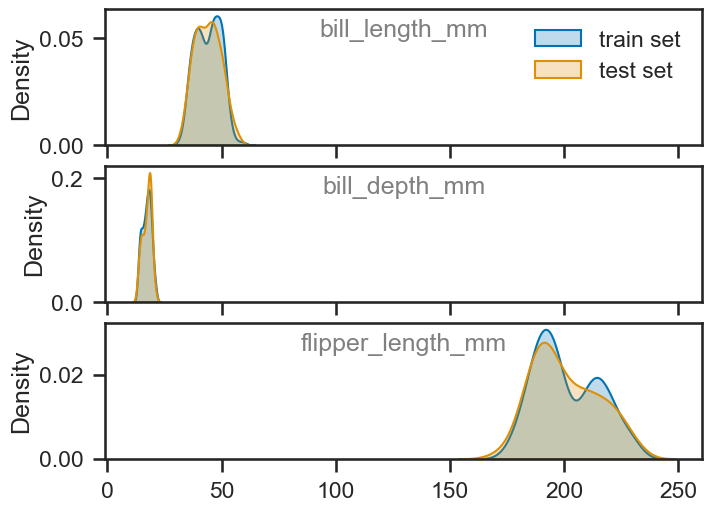

In [14]:
sns.set_style("ticks")
sns.set_palette("colorblind")
sns.set_context("talk")

import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=3, figsize=(7, 5), constrained_layout=True, sharex=True)
for ax, col in zip(axs, ["bill_length_mm", "bill_depth_mm", "flipper_length_mm"]):
    sns.kdeplot(x=col, data=X_train, fill=True, ax=ax, label="train set")
    sns.kdeplot(x=col, data=X_test, fill=True, ax=ax, label="test set")
    ax.text(0.5, 0.8, col, ha="center", transform=ax.transAxes, color="gray")
    ax.set_xlabel("")

axs[0].legend()

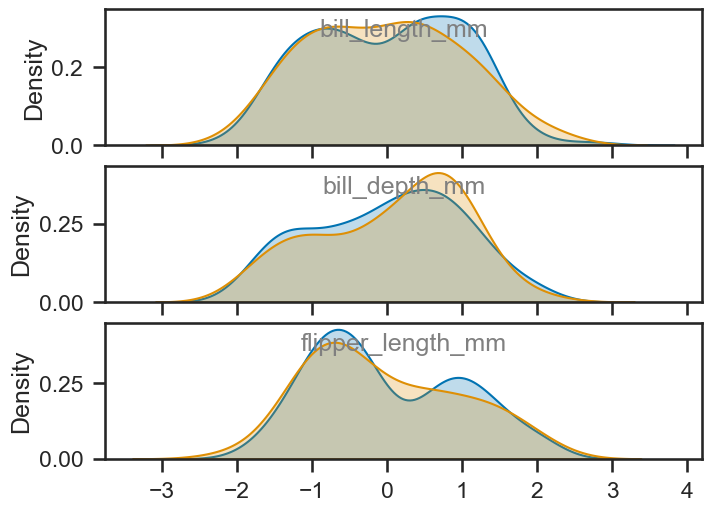

In [15]:
fig, axs = plt.subplots(nrows=3, figsize=(7, 5), constrained_layout=True, sharex=True)
for i, ax in enumerate(axs):
    sns.kdeplot(X_train_std[:, i], fill=True, ax=ax)
    sns.kdeplot(X_test_std[:, i], fill=True, ax=ax)
    ax.text(0.5, 0.8, cols_numerical[i], ha="center", transform=ax.transAxes, color="gray")
    ax.set_xlabel("")

Data Merge

In [16]:
# type of categorical data & numerical data
type(X_train_one_hot_enc), type(X_train_std)

(scipy.sparse._csr.csr_matrix, numpy.ndarray)

In [17]:
# dimension of categorical data & numerical data
X_train_one_hot_enc.toarray().shape, X_train_std.shape

((266, 8), (266, 3))

In [18]:
import numpy as np

X_train_merged = np.concatenate([X_train_one_hot_enc.toarray(), X_train_std], axis=1)    # train set 결합
X_test_merged = np.concatenate([X_test_one_hot_enc.toarray(), X_test_std], axis=1)       # test set 결합
print(X_train_merged.shape, X_test_merged.shape)

(266, 11) (67, 11)


모델학습 - Randomforest 

In [19]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

rf = RandomForestRegressor()            # 머신 러닝 모델 선택 : Random Forest Regressor
rf.fit(X_train_merged, y_train)              # 머신 러닝 모델 학습

y_train_pred = rf.predict(X_train_merged)    # 학습 X 데이터로 y 예측
y_test_pred = rf.predict(X_test_merged)      # 평가 X 데이터로 y 예측

print(f"# R2_train = {r2_score(y_train, y_train_pred):.03f}")   # 학습 데이터 R2
print(f"# R2_val = {r2_score(y_test, y_test_pred):.03f}")       # 평가 데이터 R2

# R2_train = 0.978
# R2_val = 0.870


In [20]:
def plot_parity(X_train, X_val, y_train, y_val, model):
    fig, axs = plt.subplots(ncols=2, figsize=(10, 5), constrained_layout=True, sharex=True, sharey=True)

    y_train_pred, y_val_pred = model.predict(X_train), model.predict(X_val)
    r2_train, r2_val = r2_score(y_train, y_train_pred), r2_score(y_val, y_val_pred)

    for (ax, y_true, y_pred, c, r2, label) in zip(axs, [y_train, y_val], [y_train_pred, y_val_pred], 
                                                  ["g", "m"], [r2_train, r2_val], ["train", "validation"]):
        ax.scatter(y_true, y_pred, c=c, label=f"R2={r2:.3f}", alpha=0.5)
        ax.legend(loc="lower right")
        ax.set_xlabel("true")
        ax.set_title(f"{label}", fontsize=20, color="gray", pad=12)

        if ax == axs[0]:
            ax.set_ylabel("predict", labelpad=12)

        ymin = min(y_train.min(), y_val.min())

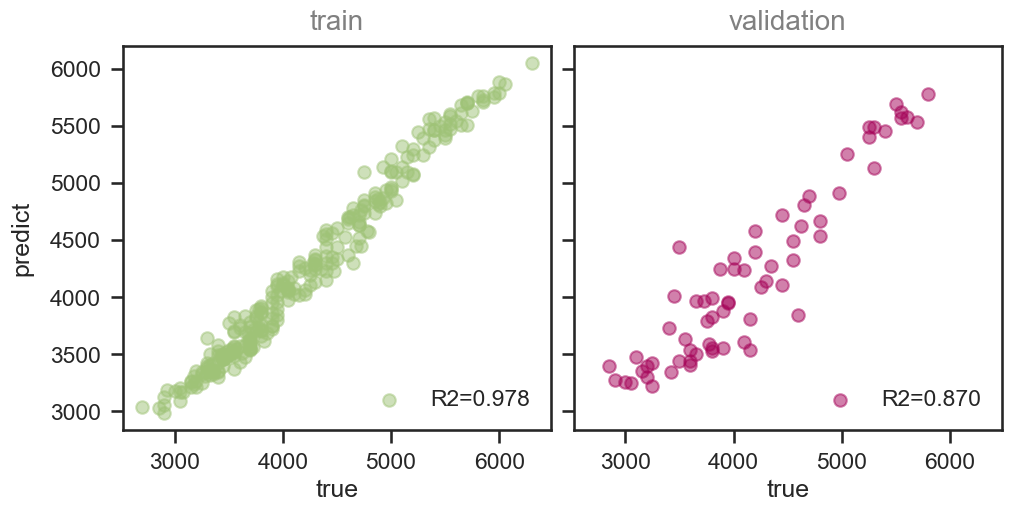

In [21]:
plot_parity(X_train_merged, X_test_merged, y_train, y_test, rf) # 예측 성능 시각화

# pipe line 구축

In [22]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# 1-1.categorical feature에 one-hot encoding 적용
cat_features = ["species", "island", "sex"]
cat_transformer = OneHotEncoder()

# 1-2.numerical feature는 standard scaler 적용
num_features = ["bill_length_mm", "bill_depth_mm", "flipper_length_mm"]
num_transformer = StandardScaler()

# 2. 인자 종류별 전처리 적용
preprocessor = ColumnTransformer([("cat", cat_transformer, cat_features), ("num", num_transformer, num_features)])

# 3. 전처리 후 랜덤포레스트 적용
pipeline = Pipeline(steps=[("preprocessor", preprocessor), ("rf", RandomForestRegressor())])

In [23]:
from sklearn import set_config

set_config(display='diagram')
pipeline.fit(X_train, y_train)      # X_train_c 아닙니다.

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                                  ['species', 'island', 'sex']),
                                                 ('num', StandardScaler(),
                                                  ['bill_length_mm',
                                                   'bill_depth_mm',
                                                   'flipper_length_mm'])])),
                ('rf', RandomForestRegressor())])

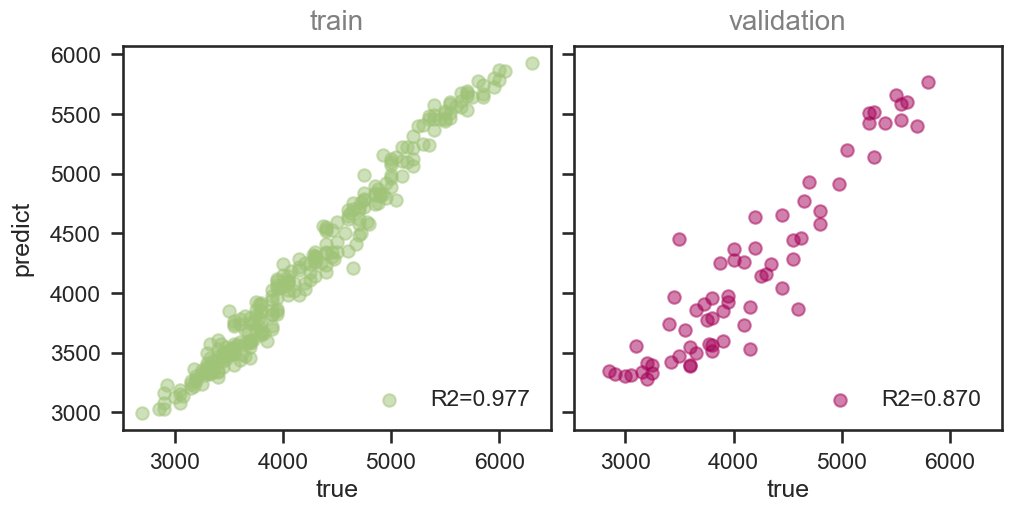

In [24]:
plot_parity(X_train, X_test, y_train, y_test, pipeline)     # pipeline 학습, 성능 평가

importance of permutation

In [25]:
from sklearn.inspection import permutation_importance

pi = permutation_importance(rf, X_train_merged, y_train, n_repeats=30)

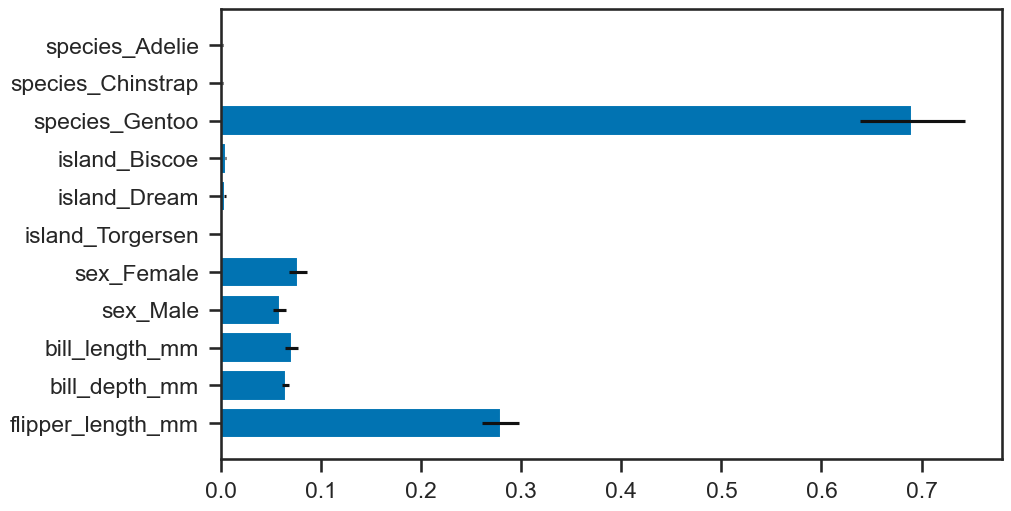

In [26]:
column_names = ["species_Adelie", "species_Chinstrap", "species_Gentoo", "island_Biscoe", "island_Dream", "island_Torgersen", "sex_Female", "sex_Male"] + cols_numerical
column_names

fig, ax = plt.subplots(figsize=(10,5), constrained_layout=True)
ax.barh(column_names, pi.importances_mean, xerr=pi.importances_std)
ax.invert_yaxis()

In [27]:
print(X_train_merged[:10])

[[ 1.          0.          0.          0.          1.          0.
   1.          0.         -1.83408722 -0.02125508 -1.15067468]
 [ 0.          1.          0.          0.          1.          0.
   0.          1.          1.330793    1.0388418  -0.57802835]
 [ 0.          0.          1.          1.          0.          0.
   0.          1.          0.91002858 -0.52606311  1.06832986]
 [ 0.          1.          0.          0.          1.          0.
   1.          0.          0.48926415  0.38259135 -0.43486676]
 [ 1.          0.          0.          0.          0.          1.
   0.          1.         -1.15720532  1.34172662 -0.22012439]
 [ 0.          0.          1.          1.          0.          0.
   1.          0.         -0.22420595 -1.48519838  0.56726432]
 [ 0.          0.          1.          1.          0.          0.
   1.          0.          0.15997026 -1.68712159  0.78200669]
 [ 1.          0.          0.          0.          0.          1.
   1.          0.         -0.80

In [28]:
X_train.iloc[:10]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,sex
92,Adelie,Dream,34.0,17.1,185.0,Female
154,Chinstrap,Dream,51.3,19.2,193.0,Male
231,Gentoo,Biscoe,49.0,16.1,216.0,Male
176,Chinstrap,Dream,46.7,17.9,195.0,Female
121,Adelie,Torgersen,37.7,19.8,198.0,Male
251,Gentoo,Biscoe,42.8,14.2,209.0,Female
304,Gentoo,Biscoe,44.9,13.8,212.0,Female
72,Adelie,Torgersen,39.6,17.2,196.0,Female
96,Adelie,Dream,38.1,18.6,190.0,Female
76,Adelie,Torgersen,40.9,16.8,191.0,Female


<BarContainer object of 6 artists>

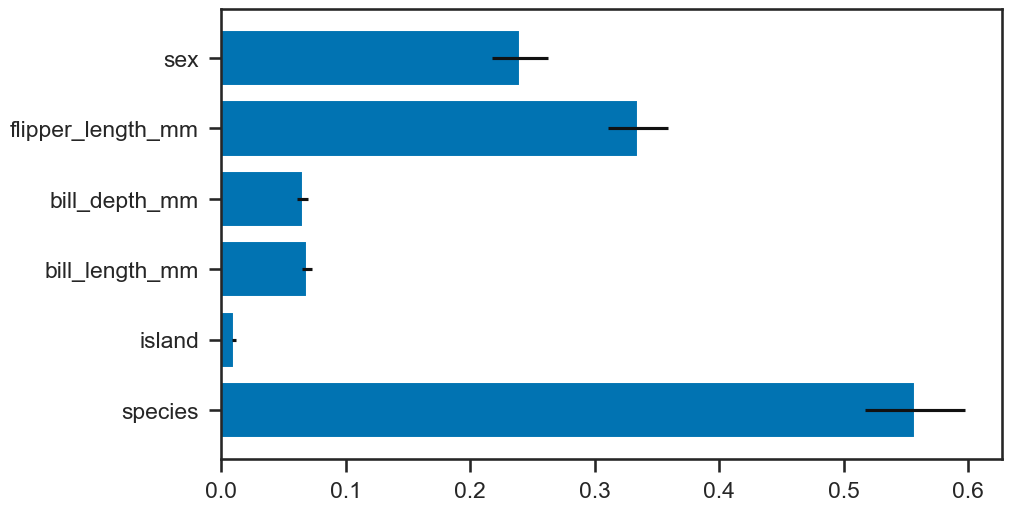

In [29]:
pi = permutation_importance(pipeline, X_train, y_train, n_repeats=30)

fig, ax = plt.subplots(figsize=(10,5), constrained_layout=True)
ax.barh(X_train.columns, pi.importances_mean, xerr=pi.importances_std)

pipe line - Decision Tree

In [30]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor

def get_model(cat_features=["species", "island", "sex"],
              num_features=["bill_length_mm", "bill_depth_mm", "flipper_length_mm"],
              **kwargs):
    # 1-1.categorical feature에 one-hot encoding 적용
    cat_transformer = OneHotEncoder()

    # 1-2.numerical feature는 standard scaler 적용
    num_transformer = StandardScaler()

    # 2. 인자 종류별 전처리 적용
    preprocessor = ColumnTransformer([("cat", cat_transformer, cat_features), 
                                      ("num", num_transformer, num_features)])

    # 3. 전처리 후 Decision Tree Regressor 적용
    pipeline = Pipeline(steps=[("preprocessor", preprocessor), 
                               ("ml", DecisionTreeRegressor(**kwargs))])

    return pipeline

In [31]:
from sklearn import set_config
set_config(display='diagram')

decision_tree = get_model()
#decision_tree = get_model(max_depth=5)
#decision_tree = get_model(max_depth=5, min_samples_leaf=5)
decision_tree

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                                  ['species', 'island', 'sex']),
                                                 ('num', StandardScaler(),
                                                  ['bill_length_mm',
                                                   'bill_depth_mm',
                                                   'flipper_length_mm'])])),
                ('ml', DecisionTreeRegressor())])

In [32]:
decision_tree.fit(X_train, y_train)
y_pred_train = decision_tree.predict(X_train)
y_pred_test = decision_tree.predict(X_test)

In [103]:
# matplotlib 최신 버전 (3.5.x) 반영
!pip install matplotlib -U    # 만약 에러 발생시 !pip install matplotlib==3.5.2 실행

# pycaret 설치
!pip install pycaret
!pip install markupsafe==2.1.1
!pip install Jinja2==3.1.2

# 설치 후 런타임 재시작

ERROR: Invalid requirement: '#'


In [33]:
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
# from xgboost import XGBRegressor

def get_model(method="dt",
              cat_features=["species", "island", "sex"],
              num_features=["bill_length_mm", "bill_depth_mm", "flipper_length_mm"],
              **kwargs):
    # 1-1.categorical feature에 one-hot encoding 적용
    cat_transformer = OneHotEncoder()

    # 1-2.numerical feature는 standard scaler 적용
    num_transformer = StandardScaler()

    # 2. 인자 종류별 전처리 적용
    preprocessor = ColumnTransformer([("cat", cat_transformer, cat_features),
                                    ("num", num_transformer, num_features)])

    # 3. 전처리 후 입력된 방법론 적용
    if method == "dt":
        ml = ("ml", DecisionTreeRegressor(**kwargs))
    elif method == "rf":
        ml = ("ml", RandomForestRegressor(**kwargs))

    pipeline = Pipeline(steps=[("preprocessor", preprocessor), ml])

    return pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                                  ['species', 'island', 'sex']),
                                                 ('num', StandardScaler(),
                                                  ['bill_length_mm',
                                                   'bill_depth_mm',
                                                   'flipper_length_mm'])])),
                ('ml', DecisionTreeRegressor())])

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                                  ['species', 'island', 'sex']),
                                                 ('num', StandardScaler(),
                                                  ['bill_length_mm',
                                                   'bill_depth_mm',
                                                   'flipper_length_mm'])])),
                ('ml', RandomForestRegressor())])

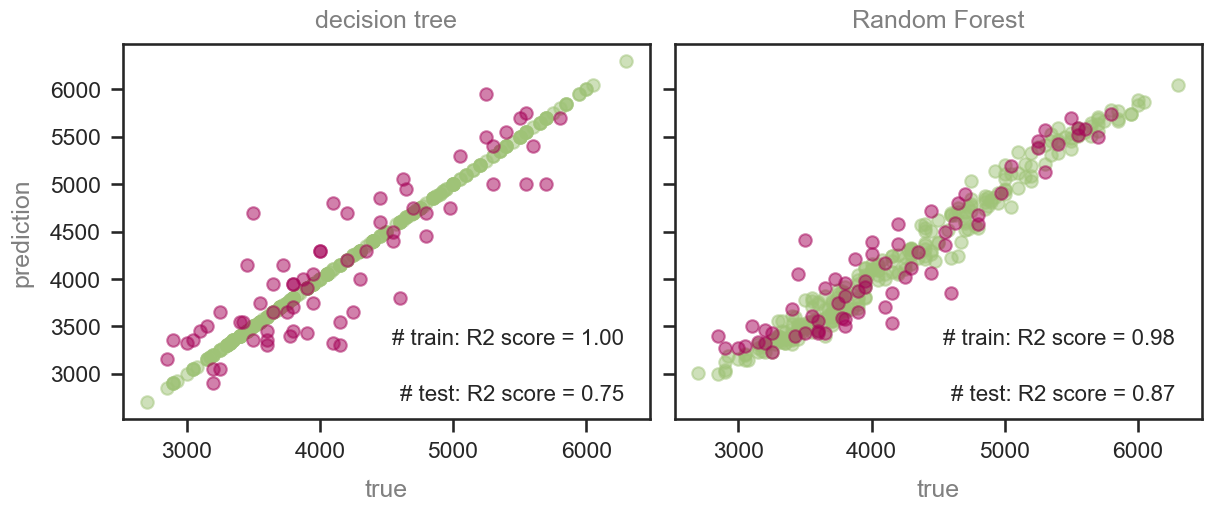

In [35]:
fig, axs = plt.subplots(ncols=2, figsize=(12,5), constrained_layout=True, sharex=True, sharey=True)
methods = ["dt", "rf"]
titles = ["decision tree", "Random Forest"]
c_train = "g"
c_test = "m"
for ax, method, title in zip(axs, methods, titles):
    model = get_model(method=method)
    model.fit(X_train, y_train)
    display(model)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    ax.scatter(y_train, y_pred_train, c=c_train, alpha=0.5)
    ax.scatter(y_test, y_pred_test, c=c_test, alpha=0.5)
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)

    ax.set_xlabel("true", color="gray", labelpad=12)
    if ax == axs[0]:
        ax.set_ylabel("prediction", color="gray", labelpad=12)
    ax.set_title(title, color="gray", pad=12)

    ax.text(0.95, 0.2, f"# train: R2 score = {r2_train:.2f}", ha="right", transform=ax.transAxes, fontsize=16)
    ax.text(0.95, 0.05, f"# test: R2 score = {r2_test:.2f}", ha="right", transform=ax.transAxes, fontsize=16)

In [36]:
from copy import deepcopy
data_pycaret = deepcopy(X_train)
data_pycaret['body_mass_g'] = y_train

In [37]:
from pycaret.regression import *
s = setup(data_pycaret, target='body_mass_g')

,Description,Value
0,Session id,5220
1,Target,body_mass_g
2,Target type,Regression
3,Original data shape,"(266, 7)"
4,Transformed data shape,"(266, 11)"
5,Transformed train set shape,"(186, 11)"
6,Transformed test set shape,"(80, 11)"
7,Numeric features,3
8,Categorical features,3
9,Preprocess,True


In [40]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lasso,Lasso Regression,247.1109,96316.8059,305.9256,0.8474,0.0760,0.0613,0.0160
llar,Lasso Least Angle Regression,247.1155,96317.2616,305.9267,0.8474,0.0760,0.0613,0.0160
lr,Linear Regression,246.9533,96439.1693,306.0781,0.8473,0.0760,0.0612,0.0190
huber,Huber Regressor,246.4265,96301.3642,305.7951,0.8467,0.0759,0.0610,0.0180
ridge,Ridge Regression,248.3894,96989.3457,307.0481,0.8464,0.0763,0.0616,0.0160
br,Bayesian Ridge,248.6444,97138.8471,307.3144,0.8462,0.0764,0.0617,0.0160
rf,Random Forest Regressor,271.1062,109824.6244,328.0721,0.8211,0.0803,0.0666,0.0460
lightgbm,Light Gradient Boosting Machine,266.9355,110351.1711,327.6434,0.8204,0.0809,0.0659,0.0420
ada,AdaBoost Regressor,275.0813,125145.6599,347.5708,0.8019,0.0837,0.0675,0.0230
et,Extra Trees Regressor,290.2414,127230.7914,353.2173,0.7956,0.0875,0.0713,0.0400
